# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

### NIHAR MUNIRAJU

**Honor Pledge:**  
I pledge on my honor that I, **Nihar Muniraju**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.2.2'

In [5]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [7]:
loans = pd.read_csv('loans.csv')

In [8]:
loans.shape

(2981, 14)

**Check out the info(), head(), and describe() methods on loans.**

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


In [10]:
loans.head(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0
5,1,debt_consolidation,0.0894,476.58,10.044987,10.10,772,5640.041667,8264,23.7,0,0,0,0
6,1,debt_consolidation,0.1253,401.60,11.264464,18.89,702,6930.000000,15074,59.6,0,0,0,0
7,1,debt_consolidation,0.1442,275.07,10.896739,7.00,662,1949.958333,14867,57.6,2,0,0,0
8,1,debt_consolidation,0.1496,623.61,11.532728,20.45,697,6210.000000,45410,41.2,0,0,0,0
9,1,debt_consolidation,0.1062,455.84,10.434116,18.07,717,2490.000000,7292,65.1,1,0,0,0


In [11]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


In [12]:
loans['not.fully.paid'].unique()

array([0, 1], dtype=int64)

In [13]:
loans['not.fully.paid'].value_counts()[1]/loans.shape[0]

0.4807111707480711

1.There are 2981 rows in the dataset, with 14 variables.


2.There are 2 unique values in not.fully.paid


3.The proportion of not.fully.paid is about 48%

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 1.0, 'Distribution of FICO over credit.policy')

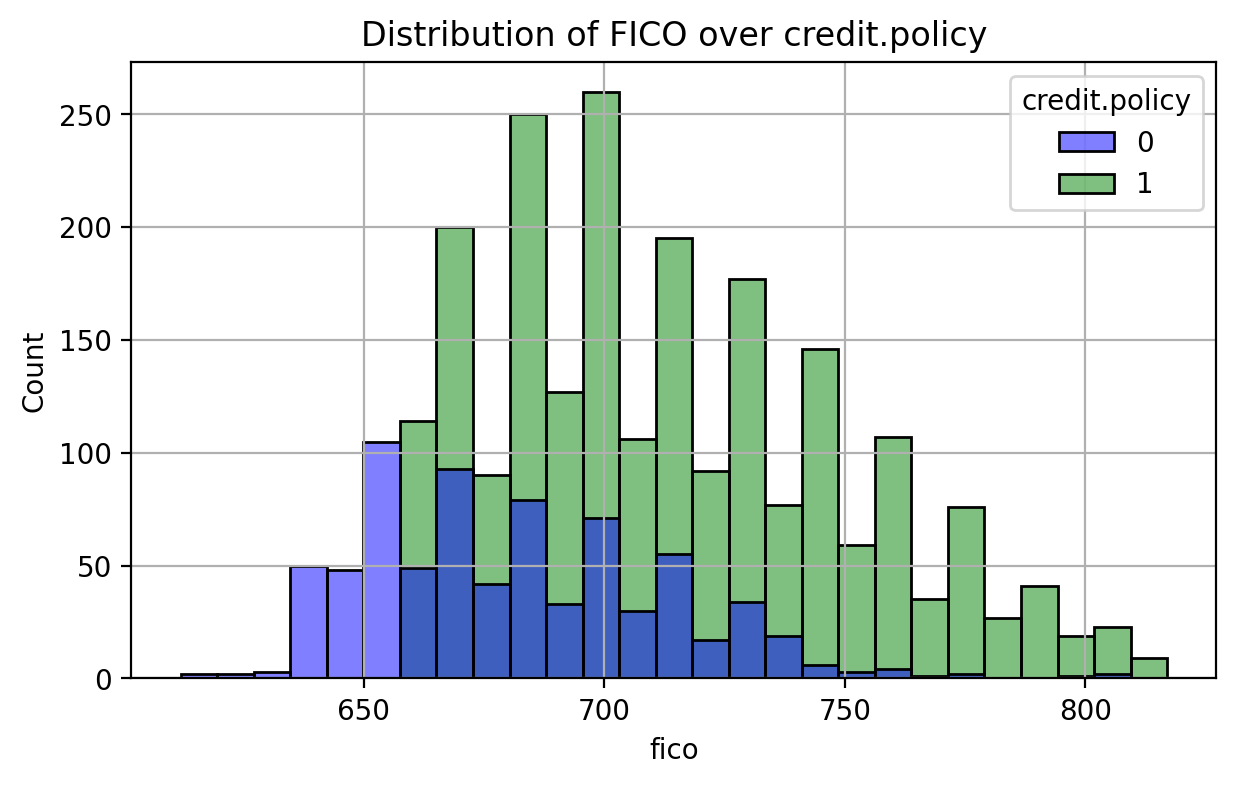

In [14]:
plt.figure(figsize=(7, 4))
sns.histplot(x='fico', data=loans, hue='credit.policy', palette={0:'blue', 1:'green'})
plt.grid()
plt.title("Distribution of FICO over credit.policy")

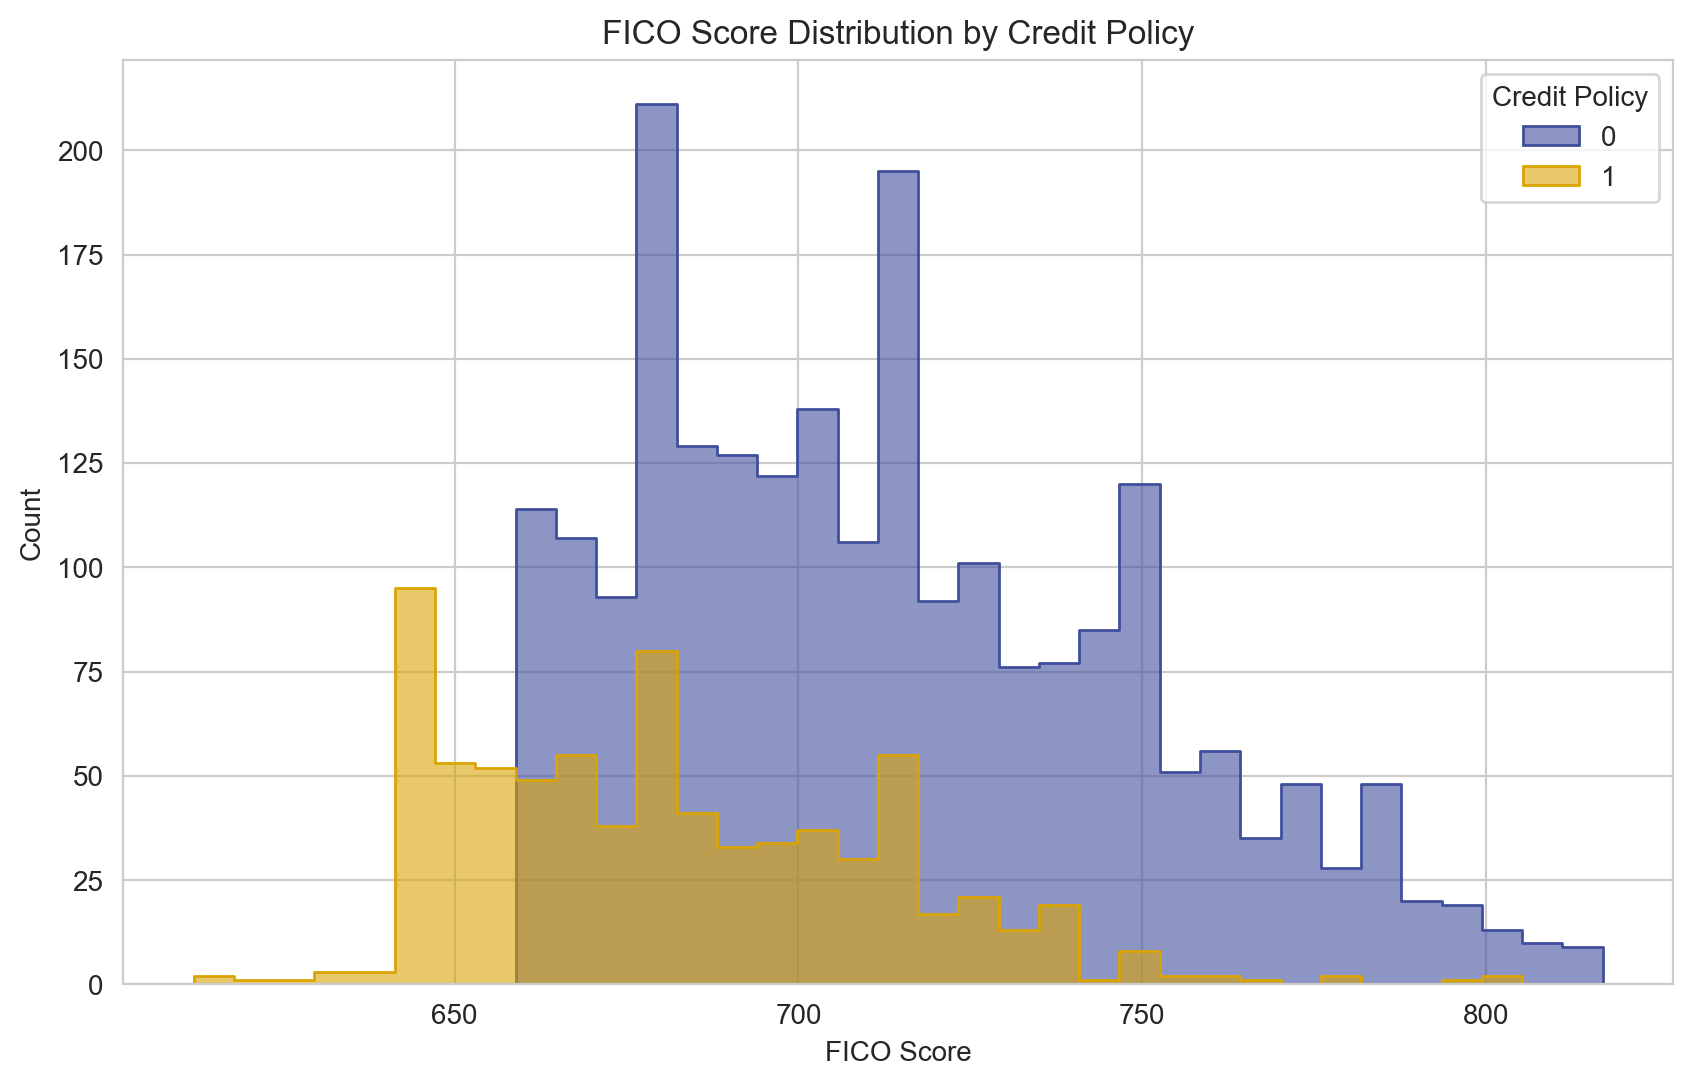

In [15]:
# Alternatively you can use seaborn library to create the same histogram (although due to bin creation, it might look different!)
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')


plt.figure(figsize=(10,6))

# Plotting the histogram with a specified dark color palette
ax = sns.histplot(
    data=loans,
    x='fico',
    hue='credit.policy',
    bins=35,
    palette=['#d9a404', '#404f9c'],
    element='step',
    alpha=0.6
)

ax.legend(title='Credit Policy', labels=['0', '1'])

plt.title('FICO Score Distribution by Credit Policy')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.show()

**Create another histogram for `not.fully.paid` column.**

Text(0.5, 1.0, 'Distribution of FICO over credit.policy')

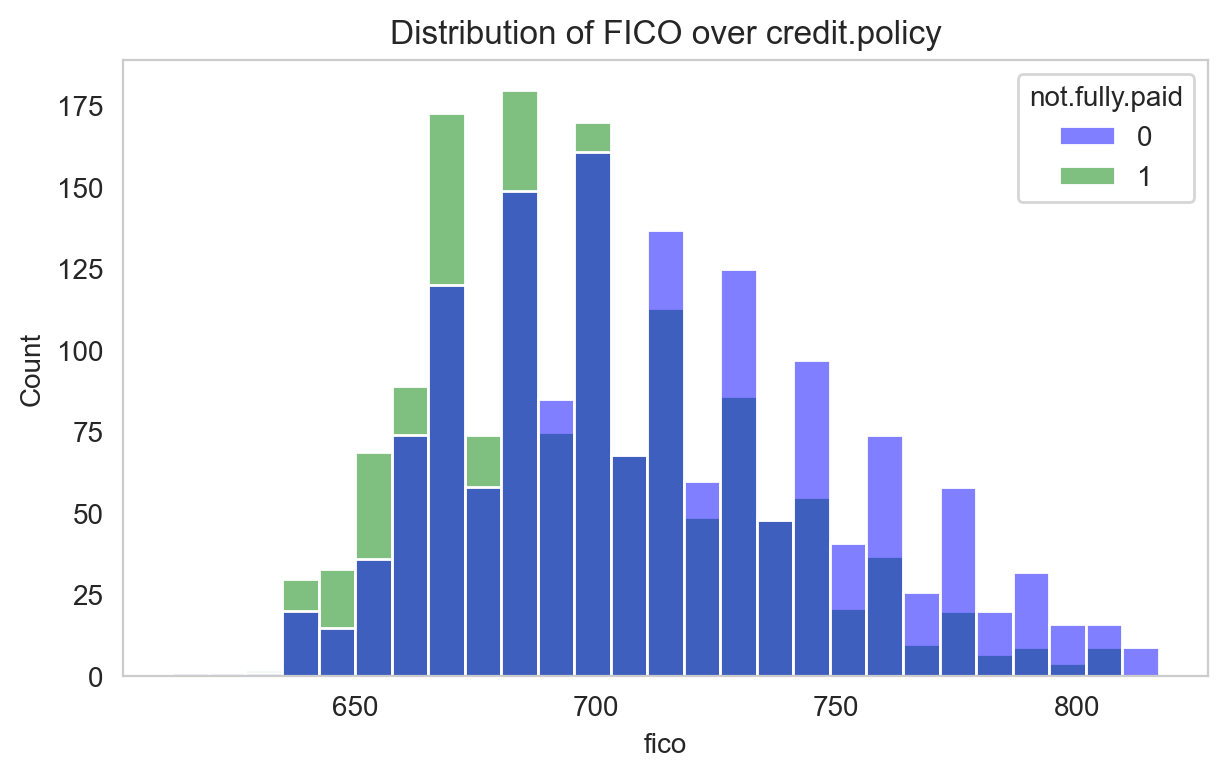

In [16]:
plt.figure(figsize=(7, 4))
sns.histplot(x='fico', data=loans, hue='not.fully.paid', palette={0:'BLUE', 1:'GREEN'})
plt.grid()
plt.title("Distribution of FICO over credit.policy")

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

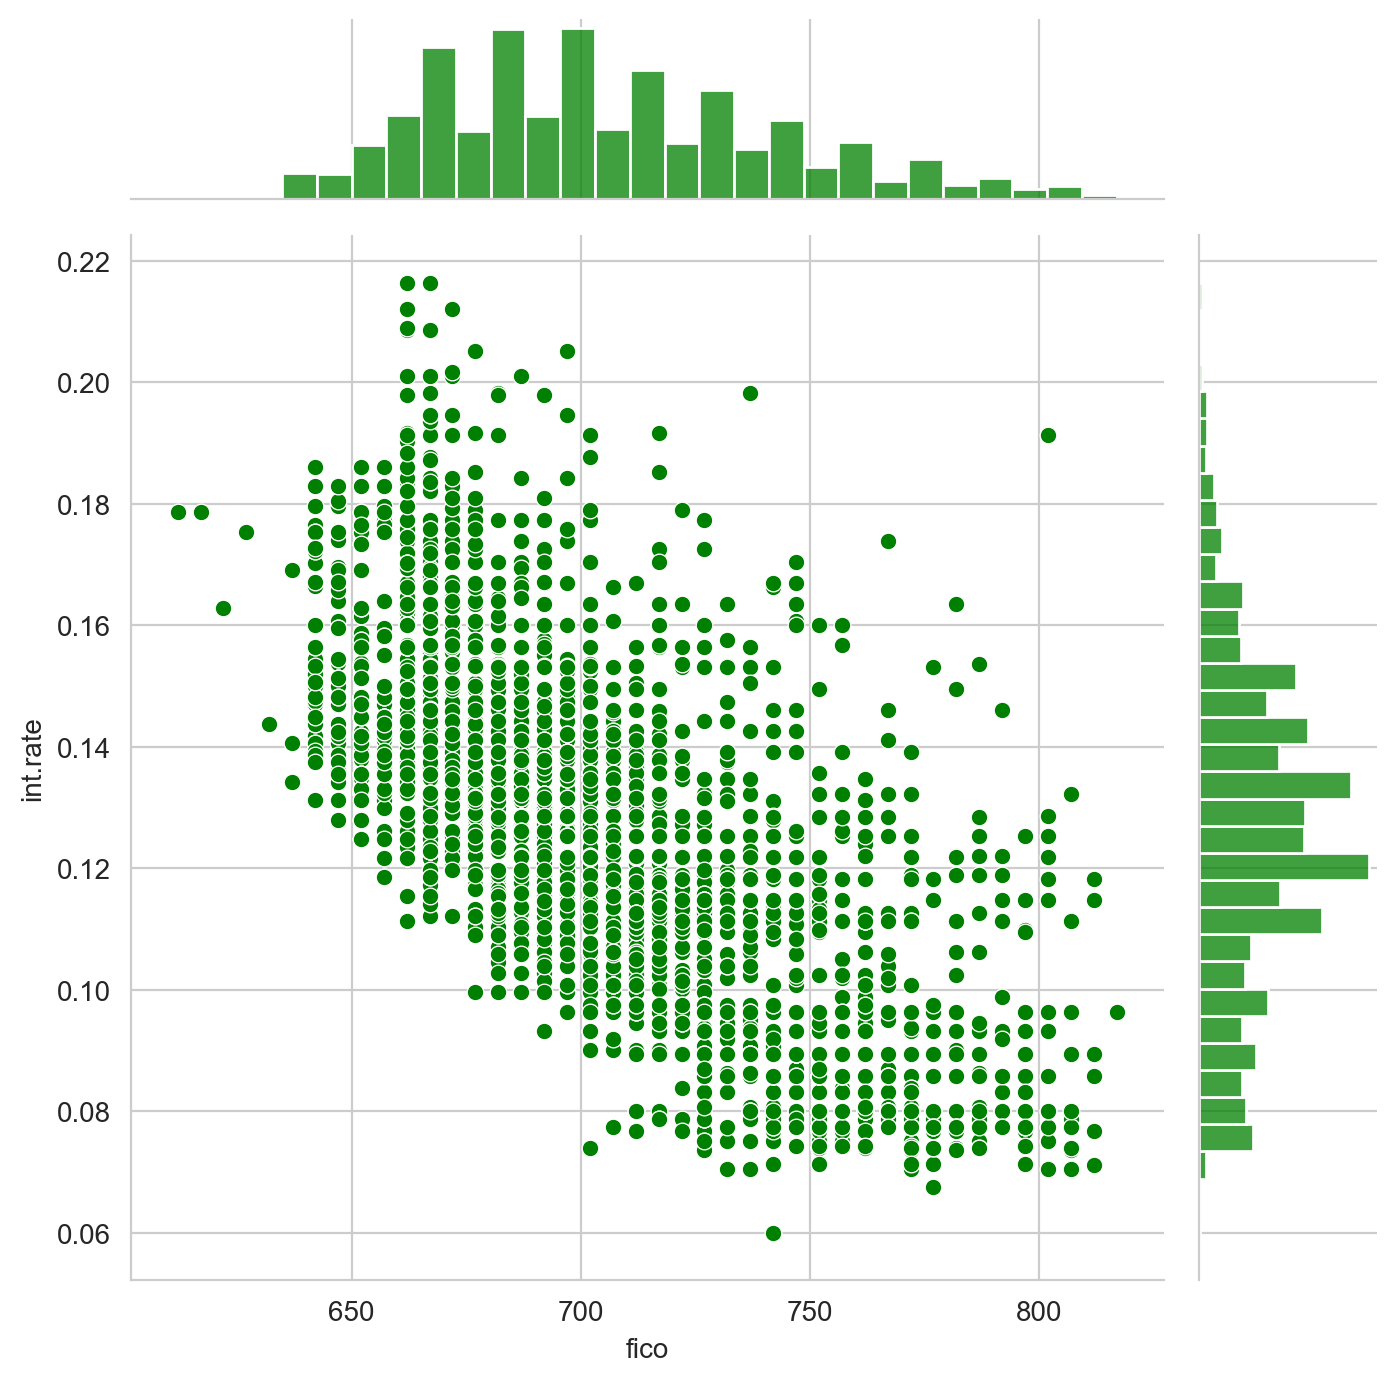

In [17]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='green', height=7)
plt.show()

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

<Figure size 600x400 with 0 Axes>

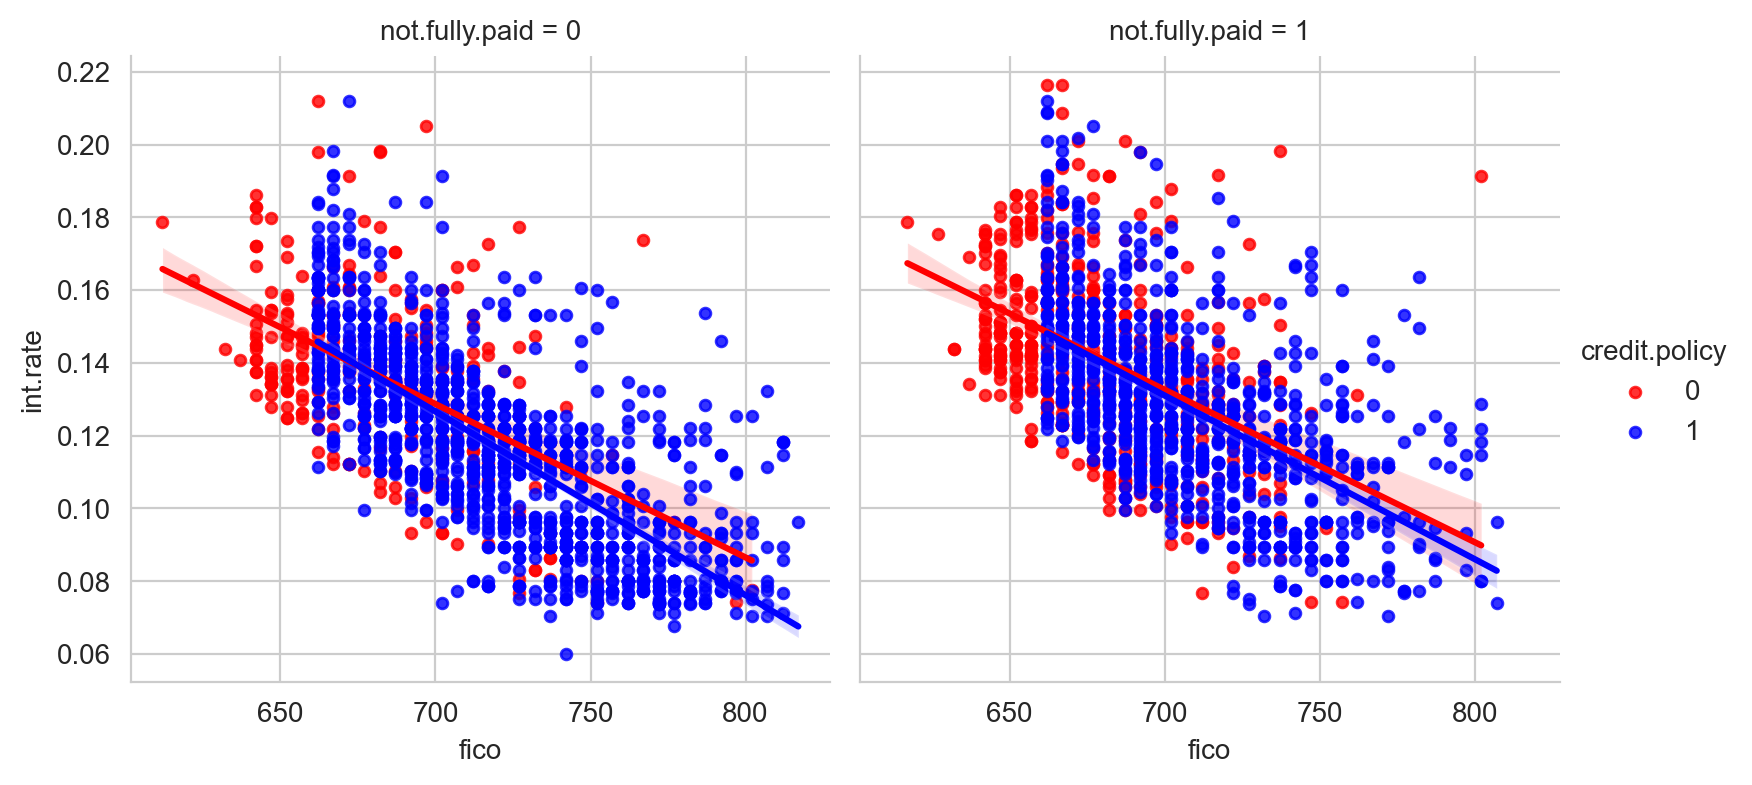

In [18]:
custom_palette = {0: "red", 1: "blue"}
plt.figure(figsize=(6, 4))
sns.lmplot(data=loans, x="fico", y="int.rate",
    hue="credit.policy", col="not.fully.paid", height=4, palette=custom_palette,
           scatter_kws={"s": 15})

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [20]:
cat_feats = ['purpose']

In [21]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [23]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,False,False,True,False,False,False,False
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,False,False,False,False,False,True,False
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,False,True,False,False,False,False,False
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,False,False,True,False,False,False,False


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,False,False,True,False,False,False,False
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,False,False,False,False,False,True,False
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,False,True,False,False,False,False,False
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,False,False,True,False,False,False,False
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,False,False,True,False,False,False,False
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,False,False,True,False,False,False,False
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,False,False,False,False,True,False,False


In [26]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

<Axes: xlabel='not.fully.paid'>

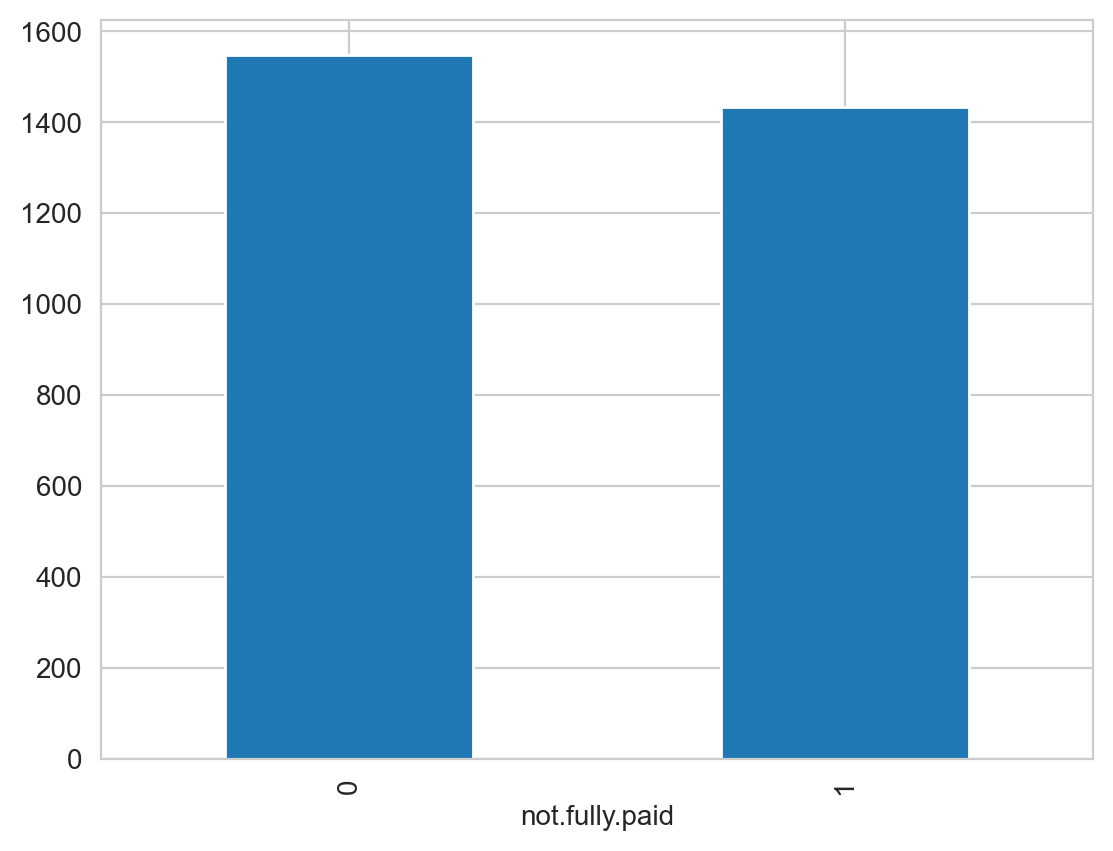

In [27]:
y.value_counts().plot(kind='bar')

<Axes: xlabel='not.fully.paid'>

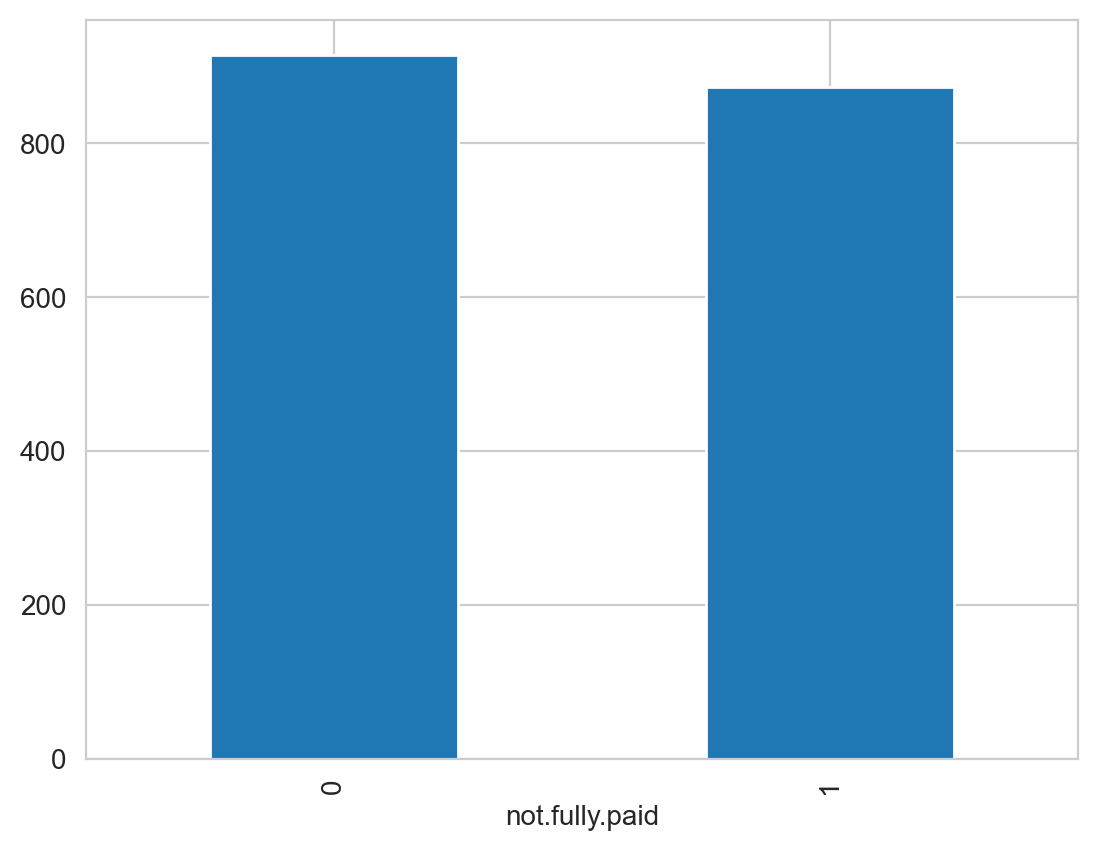

In [28]:
y_train.value_counts().plot(kind='bar')

<Axes: xlabel='not.fully.paid'>

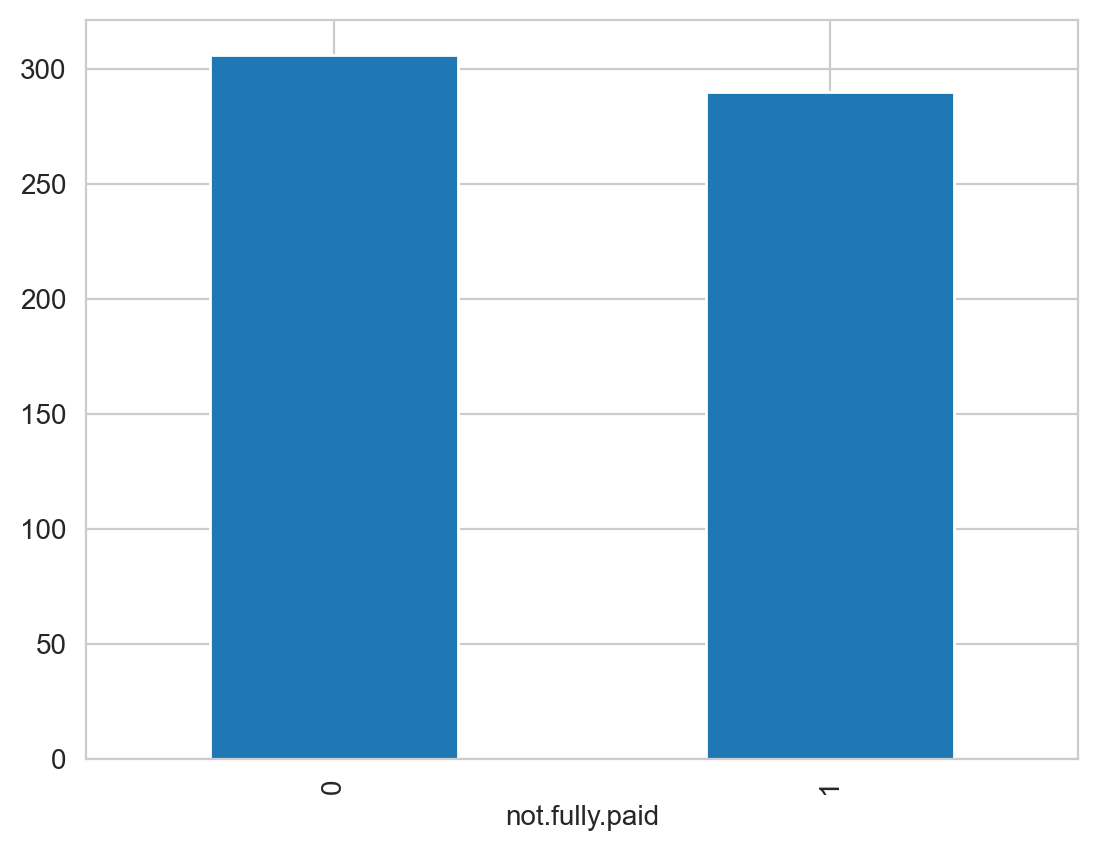

In [29]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

In [30]:
# Initiating the Decision Tree classifier and fitting the model
dtree = DecisionTreeClassifier(random_state=RANDOM_STATE)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Make predictions on the validation set
y_val_pred = dtree.predict(X_val)

In [32]:
# Calculate accuracy on the training and validation sets
train_accuracy = accuracy_score(y_train, dtree.predict(X_train))
val_accuracy = accuracy_score(y_val, y_val_pred)

In [33]:
# Generate the confusion matrix for the validation set
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)

In [34]:
# Generate the classification report for the validation set
val_classification_report = classification_report(y_val, y_val_pred)

In [35]:
# Print the metrics
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Confusion Matrix:")
print(val_confusion_matrix)
print("Validation Classification Report:")
print(val_classification_report)

Training Accuracy: 1.0
Validation Accuracy: 0.5620805369127517
Validation Confusion Matrix:
[[167 139]
 [122 168]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       306
           1       0.55      0.58      0.56       290

    accuracy                           0.56       596
   macro avg       0.56      0.56      0.56       596
weighted avg       0.56      0.56      0.56       596



In [36]:
param_grid = {'min_samples_split': [2, 10, 20, 40, 80]}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), param_grid, cv=5, scoring='f1', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Print cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Cross-validation results:")
print(cv_results[['param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']])

# Use the best estimator to make predictions on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Performance metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred)

# Print the metrics
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Confusion Matrix:")
print(val_confusion_matrix)
print("Validation Classification Report:")
print(val_classification_report)

Best parameters: {'min_samples_split': 80}
Best score: 0.5631475892874616
Cross-validation results:
  param_min_samples_split  mean_test_score  std_test_score  rank_test_score
0                       2         0.539482        0.027532                4
1                      10         0.533346        0.019620                5
2                      20         0.552439        0.021448                2
3                      40         0.545442        0.011280                3
4                      80         0.563148        0.020578                1
Validation Accuracy: 0.5956375838926175
Validation Confusion Matrix:
[[206 100]
 [141 149]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       306
           1       0.60      0.51      0.55       290

    accuracy                           0.60       596
   macro avg       0.60      0.59      0.59       596
weighted avg       0.60      0.60      0.59   

In [37]:
param_grid = {'max_depth': [None, 3, 6, 9, 12]}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), param_grid, cv=5, scoring='f1', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Print cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Cross-validation results:")
print(cv_results[['param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']])

# Use the best estimator to make predictions on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Performance metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred)

# Print the metrics
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Confusion Matrix:")
print(val_confusion_matrix)
print("Validation Classification Report:")
print(val_classification_report)

Best parameters: {'max_depth': 6}
Best score: 0.5666217982773541
Cross-validation results:
  param_max_depth  mean_test_score  std_test_score  rank_test_score
0            None         0.539482        0.027532                4
1               3         0.440943        0.124572                5
2               6         0.566622        0.019787                1
3               9         0.553576        0.040119                2
4              12         0.544830        0.025165                3
Validation Accuracy: 0.5822147651006712
Validation Confusion Matrix:
[[202 104]
 [145 145]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       306
           1       0.58      0.50      0.54       290

    accuracy                           0.58       596
   macro avg       0.58      0.58      0.58       596
weighted avg       0.58      0.58      0.58       596



In [38]:
param_grid = {
    'min_samples_split': [2, 10, 20, 40, 80],
    'max_depth': [None, 3, 6, 9, 12]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), param_grid, cv=5, scoring='f1', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best estimator to make predictions on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Performance metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred)

# Print the metrics
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Confusion Matrix:")
print(val_confusion_matrix)
print("Validation Classification Report:")
print(val_classification_report)

Best parameters: {'max_depth': 9, 'min_samples_split': 80}
Best score: 0.59075081561144
Validation Accuracy: 0.5838926174496645
Validation Confusion Matrix:
[[195 111]
 [137 153]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       306
           1       0.58      0.53      0.55       290

    accuracy                           0.58       596
   macro avg       0.58      0.58      0.58       596
weighted avg       0.58      0.58      0.58       596



In [39]:
# Display the cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results[['param_min_samples_split', 'param_max_depth', 'mean_test_score', 'rank_test_score']])

   param_min_samples_split param_max_depth  mean_test_score  rank_test_score
0                        2            None         0.539482               19
1                       10            None         0.533346               20
2                       20            None         0.552439               13
3                       40            None         0.545442               16
4                       80            None         0.563148               10
5                        2               3         0.440943               24
6                       10               3         0.440943               24
7                       20               3         0.444159               21
8                       40               3         0.444159               21
9                       80               3         0.443353               23
10                       2               6         0.566622                8
11                      10               6         0.566092                9

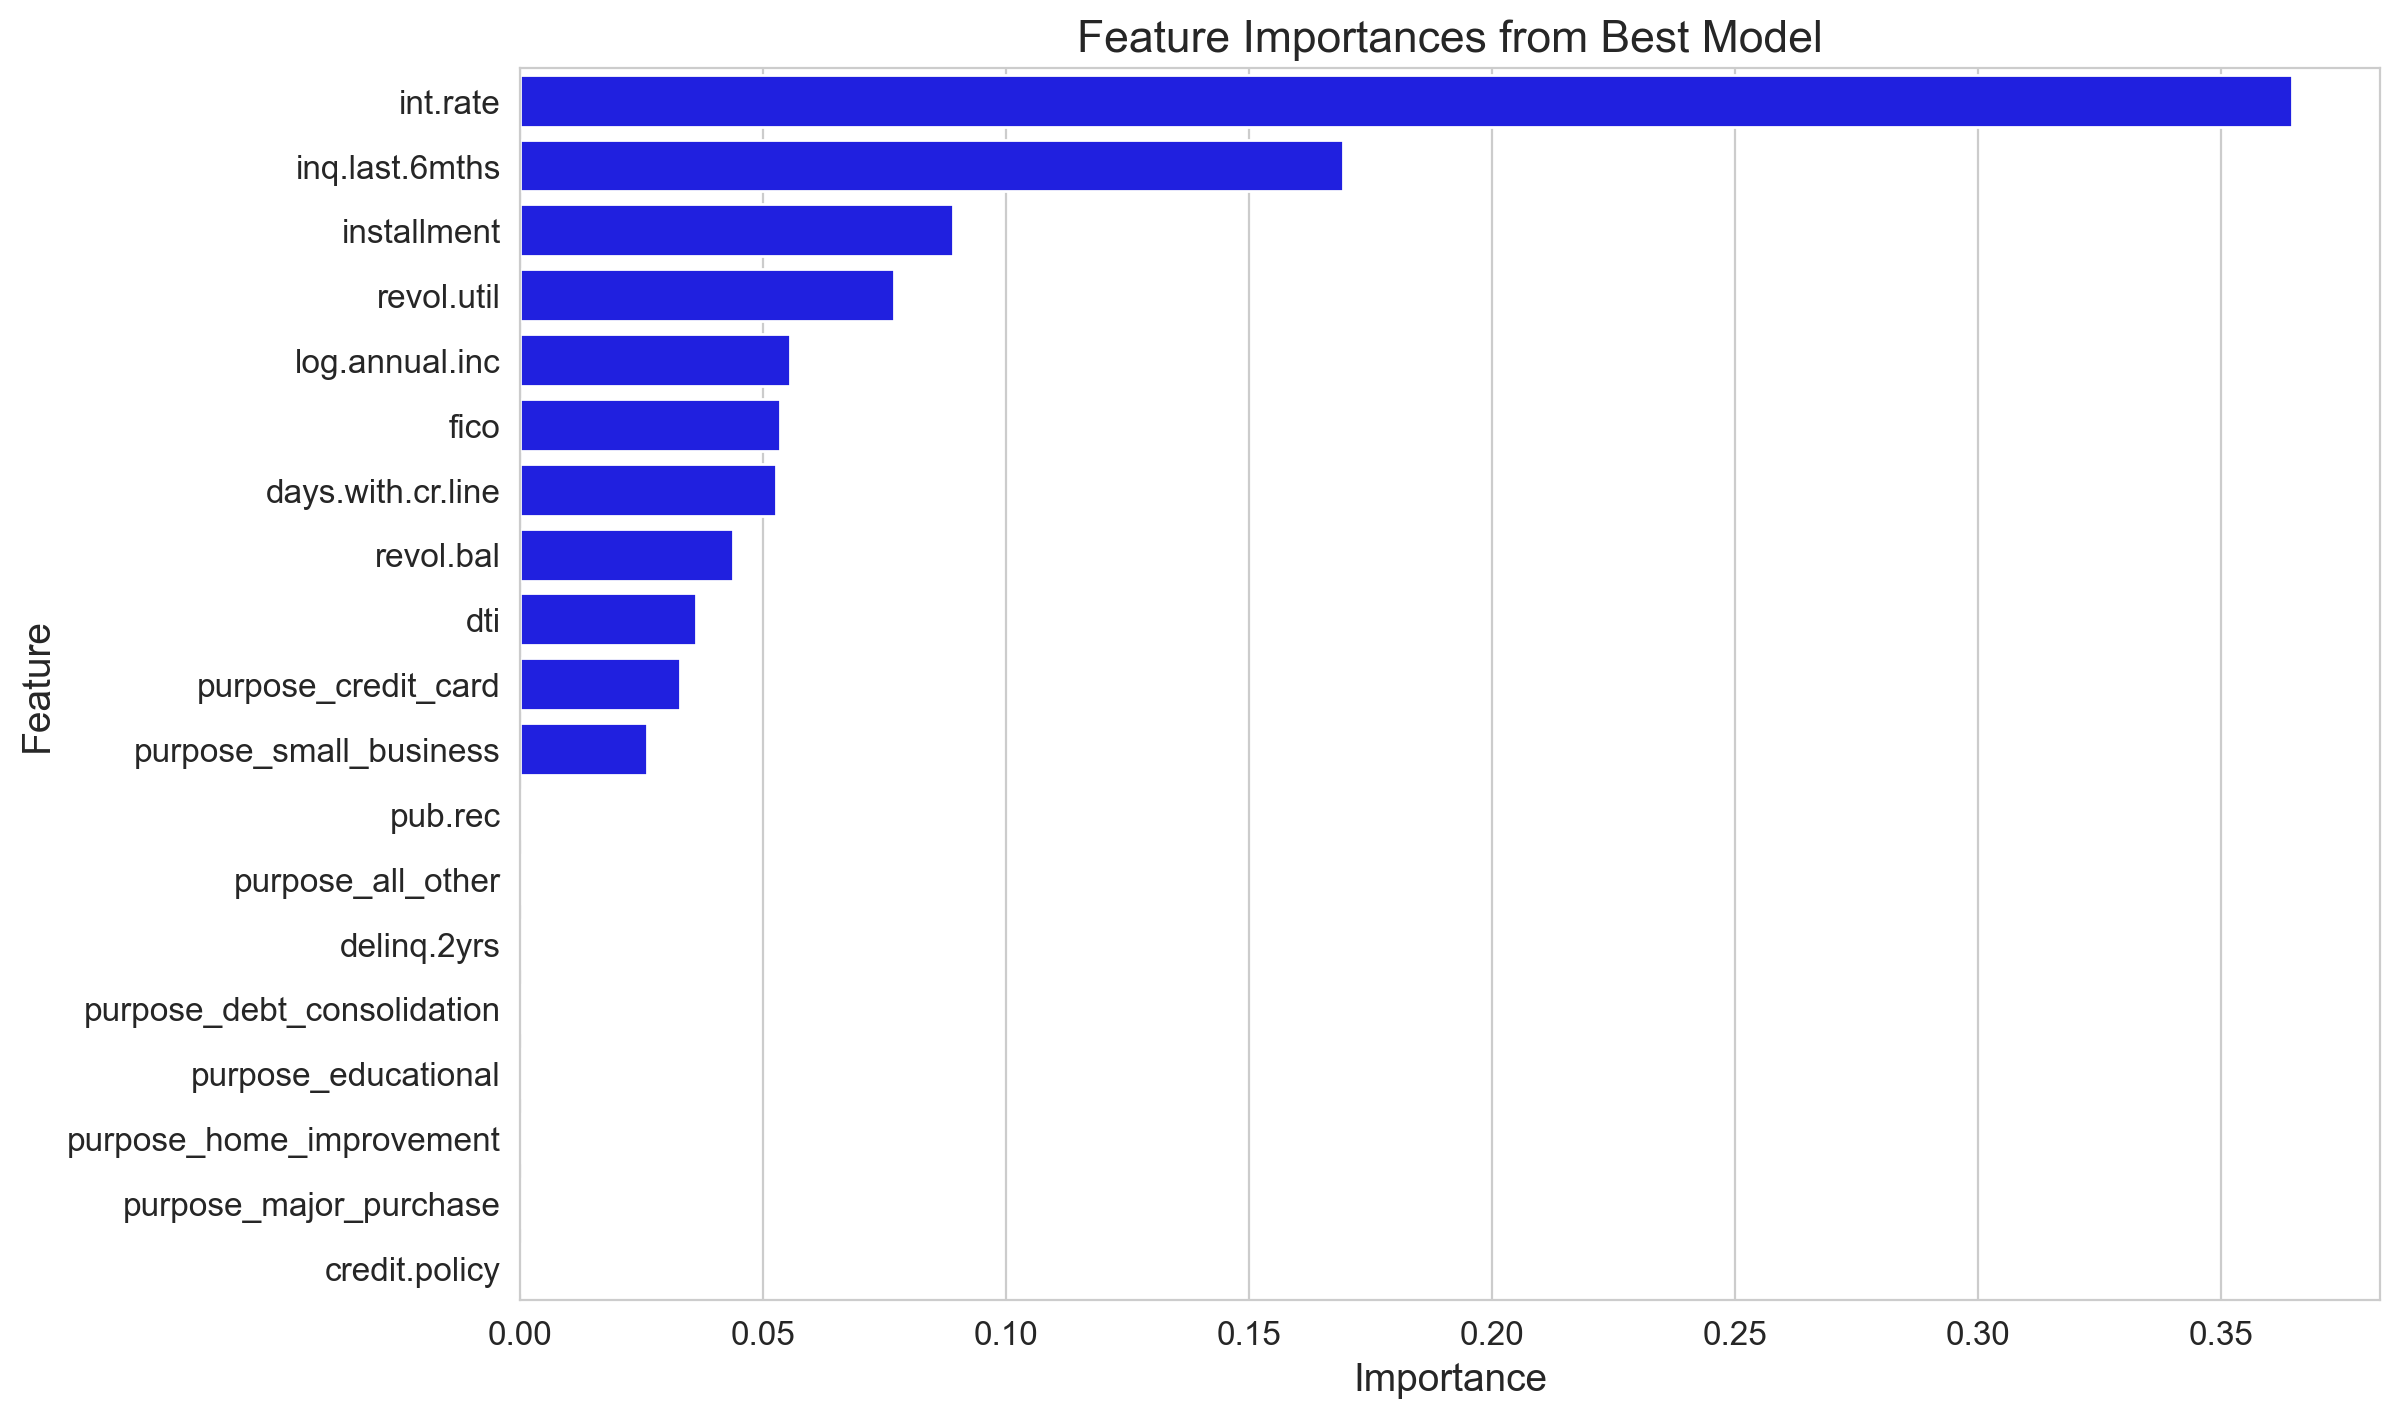

In [40]:
# Get feature importances from the best model
best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold the feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8)) 
sns.barplot(x='Importance', y='Feature', data=importance_df, color='blue')  
plt.title('Feature Importances from Best Model', fontsize=16)  
plt.xlabel('Importance', fontsize=14)  
plt.ylabel('Feature', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Instantiate and fit the Random Forest model
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

# Make predictions on the training and validation set
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

# Calculate accuracy on the training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Generate the confusion matrix for the validation set
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)

# Generate the classification report for the validation set
val_classification_report = classification_report(y_val, y_val_pred)

# Print the metrics
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Confusion Matrix:")
print(val_confusion_matrix)
print("Validation Classification Report:")
print(val_classification_report)

Training Accuracy: 1.0
Validation Accuracy: 0.6073825503355704
Validation Confusion Matrix:
[[191 115]
 [119 171]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       306
           1       0.60      0.59      0.59       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



In [43]:
# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 10, 20],
    'max_depth': [None, 3, 6, 9],
    'n_estimators': [100, 200, 300]
}

# Instantiate the GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

# Use the best estimator to make predictions on the validation set
best_rf_model = grid_search_rf.best_estimator_
y_val_pred = best_rf_model.predict(X_val)

# Performance metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred)

# Print the metrics
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Confusion Matrix:")
print(val_confusion_matrix)
print("Validation Classification Report:")
print(val_classification_report)


Best parameters: {'max_depth': None, 'min_samples_split': 20, 'n_estimators': 300}
Best score: 0.6058957140453073
Validation Accuracy: 0.6140939597315436
Validation Confusion Matrix:
[[186 120]
 [110 180]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       306
           1       0.60      0.62      0.61       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



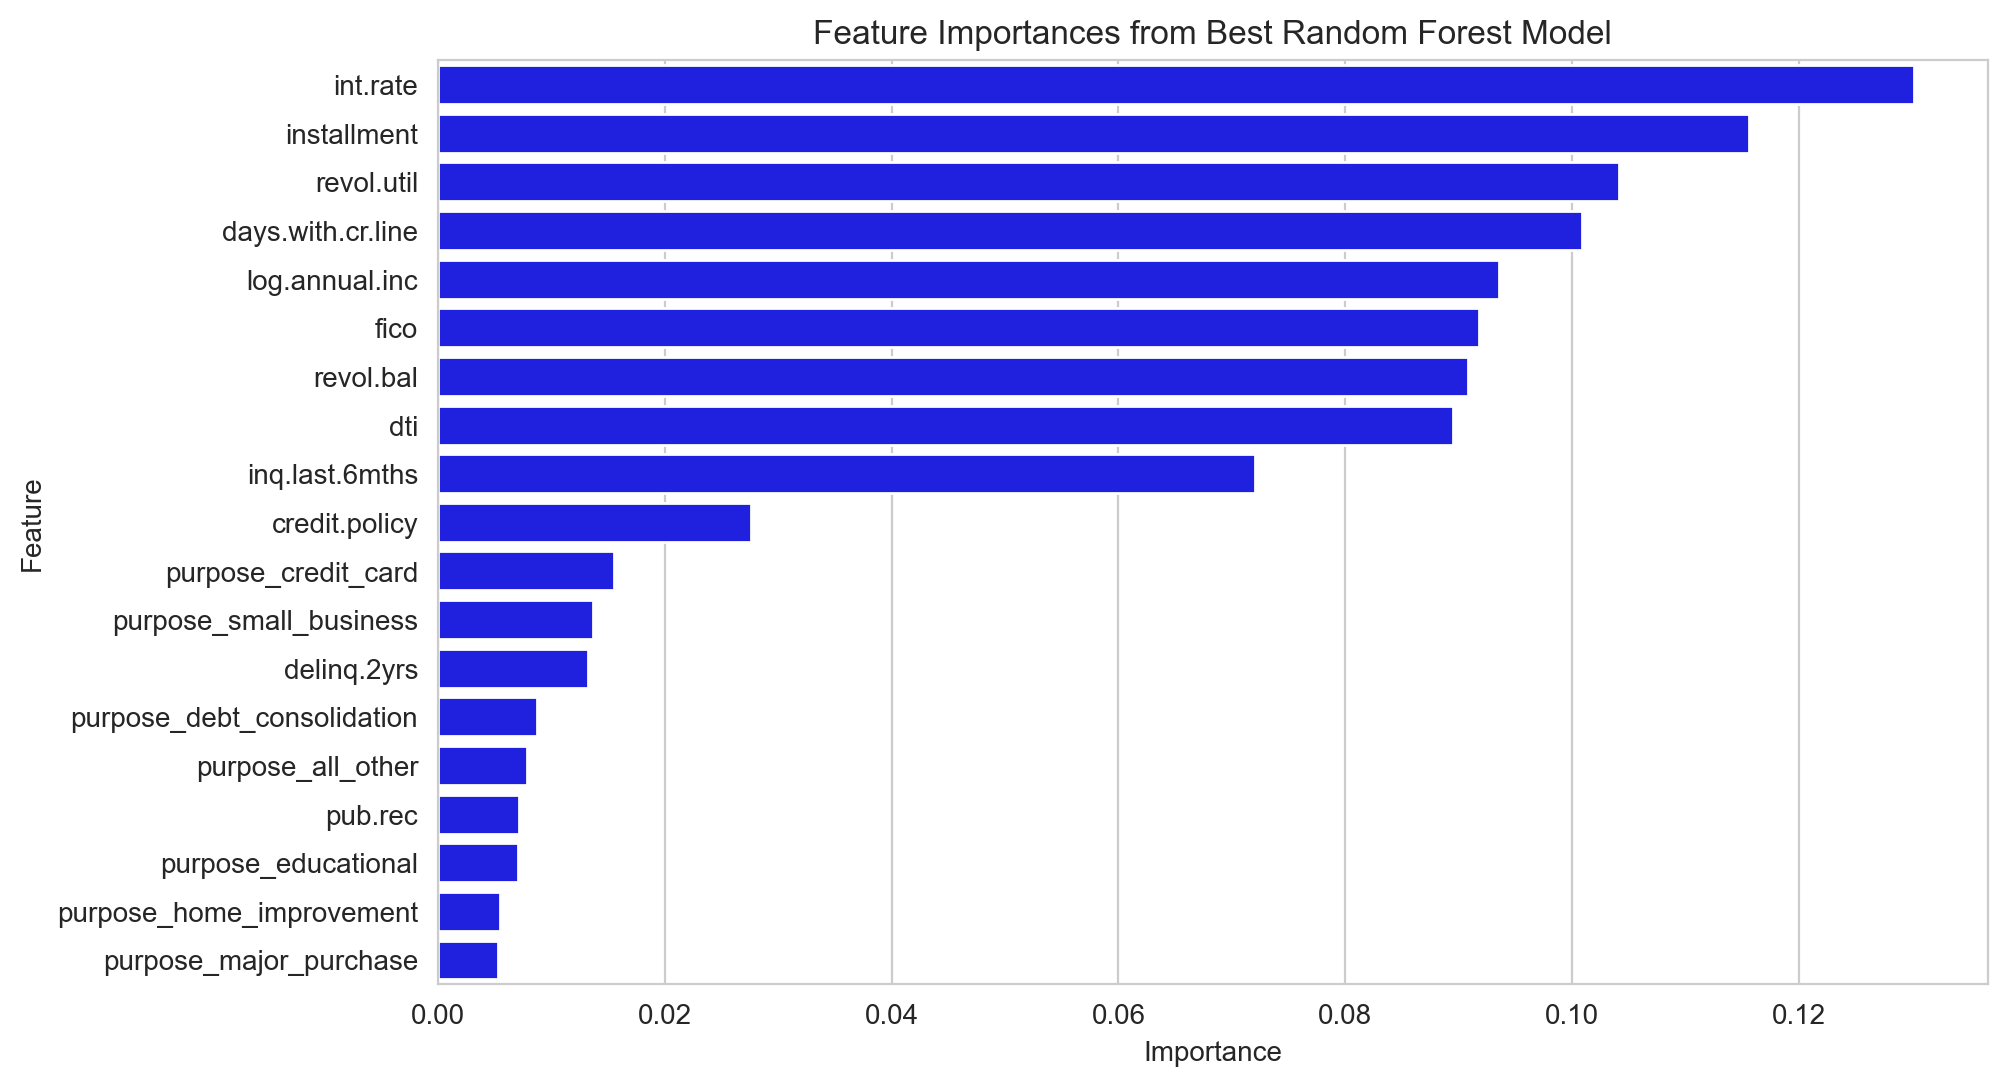

In [44]:
# Get feature importances from the best Random Forest model
feature_importances_rf = best_rf_model.feature_importances_

# Create a DataFrame to hold the feature names and their importances
importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, color='blue')
plt.title('Feature Importances from Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
ada_model = AdaBoostClassifier(random_state=RANDOM_STATE)
ada_model.fit(X_train, y_train)

# Predictions
train_preds = ada_model.predict(X_train)
val_preds = ada_model.predict(X_val)

# Print accuracy scores
print('Train accuracy:', accuracy_score(y_train, train_preds))
print('Validation accuracy:', accuracy_score(y_val, val_preds))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, val_preds))

# Classification report
print("Classification Report:")
print(classification_report(y_val, val_preds))

Train accuracy: 0.6739373601789709
Validation accuracy: 0.5855704697986577
Confusion Matrix:
[[177 129]
 [118 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       306
           1       0.57      0.59      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



In [47]:
from sklearn.model_selection import GridSearchCV

# Parameter tuning for learning_rate and n_estimators
params = {
    'learning_rate': np.linspace(0.01, 1, 10),
    'n_estimators': np.linspace(50, 1000, 20).astype(int)
}

ada_classifier = AdaBoostClassifier(random_state=RANDOM_STATE)
grid_cv = GridSearchCV(ada_classifier, params, cv=3, n_jobs=-1, scoring='f1', verbose=3)
grid_cv.fit(X_train, y_train)

print("Best score:", grid_cv.best_score_)
print("Best parameters:", grid_cv.best_params_)

# Get best model and predict
best_model = grid_cv.best_estimator_
val_preds = best_model.predict(X_val)

# Print performance metrics
print("Classification Report for Best Model:")
print(classification_report(y_val, val_preds))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best score: 0.5808412952051222
Best parameters: {'learning_rate': 0.34, 'n_estimators': 50}
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       306
           1       0.59      0.59      0.59       290

    accuracy                           0.60       596
   macro avg       0.60      0.60      0.60       596
weighted avg       0.60      0.60      0.60       596



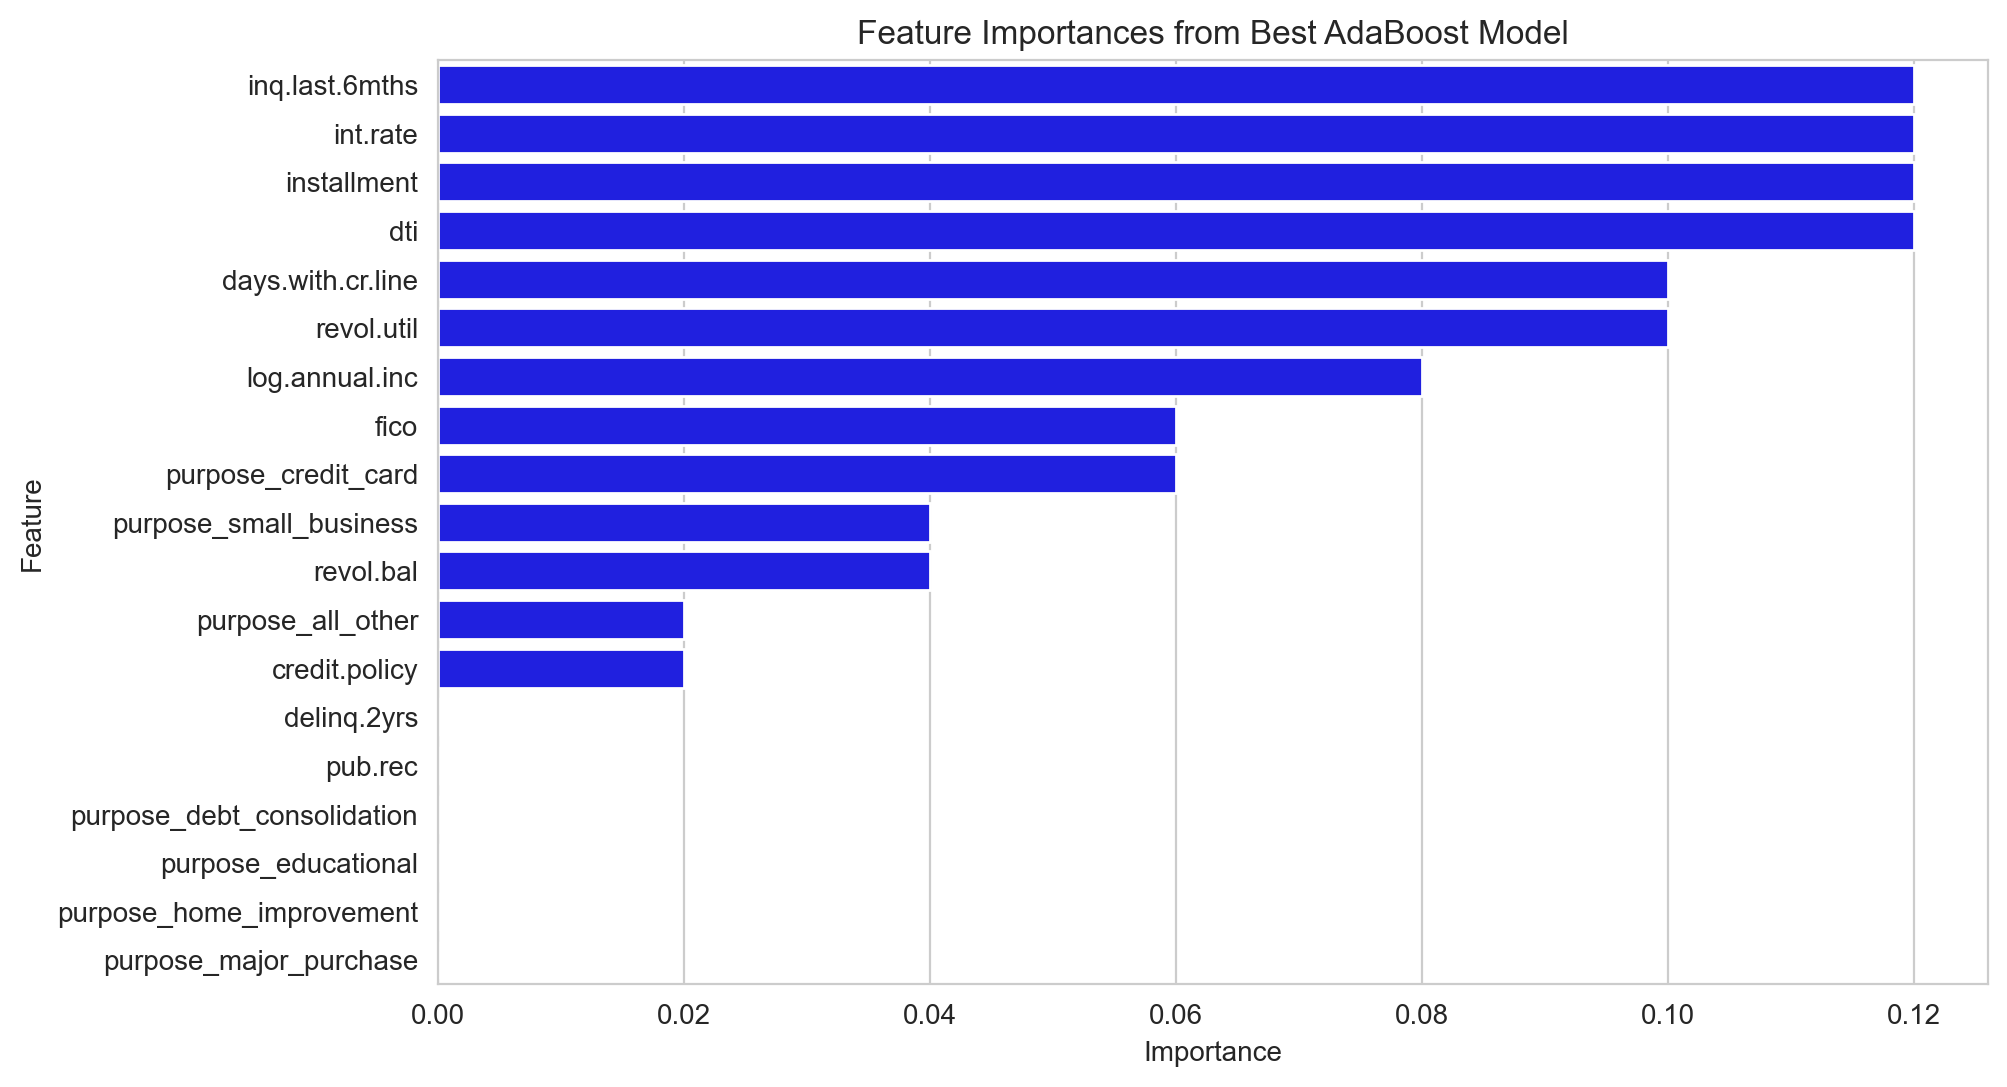

In [48]:
feature_importances_ada = best_model.feature_importances_

# Create a DataFrame to hold the feature names and their importances
importance_df_ada = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_ada})

# Sort the DataFrame by importance
importance_df_ada = importance_df_ada.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_ada, color='blue')
plt.title('Feature Importances from Best AdaBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)

# Make predictions on the training and validation set
y_train_pred_gb = gb.predict(X_train)
y_val_pred_gb = gb.predict(X_val)

# Calculate accuracy on the training and validation sets
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
val_accuracy_gb = accuracy_score(y_val, y_val_pred_gb)

# Generate the confusion matrix for the validation set
val_confusion_matrix_gb = confusion_matrix(y_val, y_val_pred_gb)

# Generate the classification report for the validation set
val_classification_report_gb = classification_report(y_val, y_val_pred_gb)

# Print the metrics
print(f"Training Accuracy for Gradient Boosting: {train_accuracy_gb}")
print(f"Validation Accuracy for Gradient Boosting: {val_accuracy_gb}")
print("Validation Confusion Matrix for Gradient Boosting:")
print(val_confusion_matrix_gb)
print("Validation Classification Report for Gradient Boosting:")
print(val_classification_report_gb)


Training Accuracy for Gradient Boosting: 0.7986577181208053
Validation Accuracy for Gradient Boosting: 0.610738255033557
Validation Confusion Matrix for Gradient Boosting:
[[193 113]
 [119 171]]
Validation Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       306
           1       0.60      0.59      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



In [51]:
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200]
}

# Instantiate the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=RANDOM_STATE), param_grid_gb, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)

# Use the best estimator to make predictions on the validation set
best_gb_model = grid_search_gb.best_estimator_
y_val_pred_gb = best_gb_model.predict(X_val)

# Performance metrics for the validation set
val_accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
val_confusion_matrix_gb = confusion_matrix(y_val, y_val_pred_gb)
val_classification_report_gb = classification_report(y_val, y_val_pred_gb)

# Print the metrics
print(f"Validation Accuracy for Best Gradient Boosting Model: {val_accuracy_gb}")
print("Validation Confusion Matrix for Best Gradient Boosting Model:")
print(val_confusion_matrix_gb)
print("Validation Classification Report for Best Gradient Boosting Model:")
print(val_classification_report_gb)


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 100}
Best score for Gradient Boosting: 0.6034265539204801
Validation Accuracy for Best Gradient Boosting Model: 0.610738255033557
Validation Confusion Matrix for Best Gradient Boosting Model:
[[193 113]
 [119 171]]
Validation Classification Report for Best Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       306
           1       0.60      0.59      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



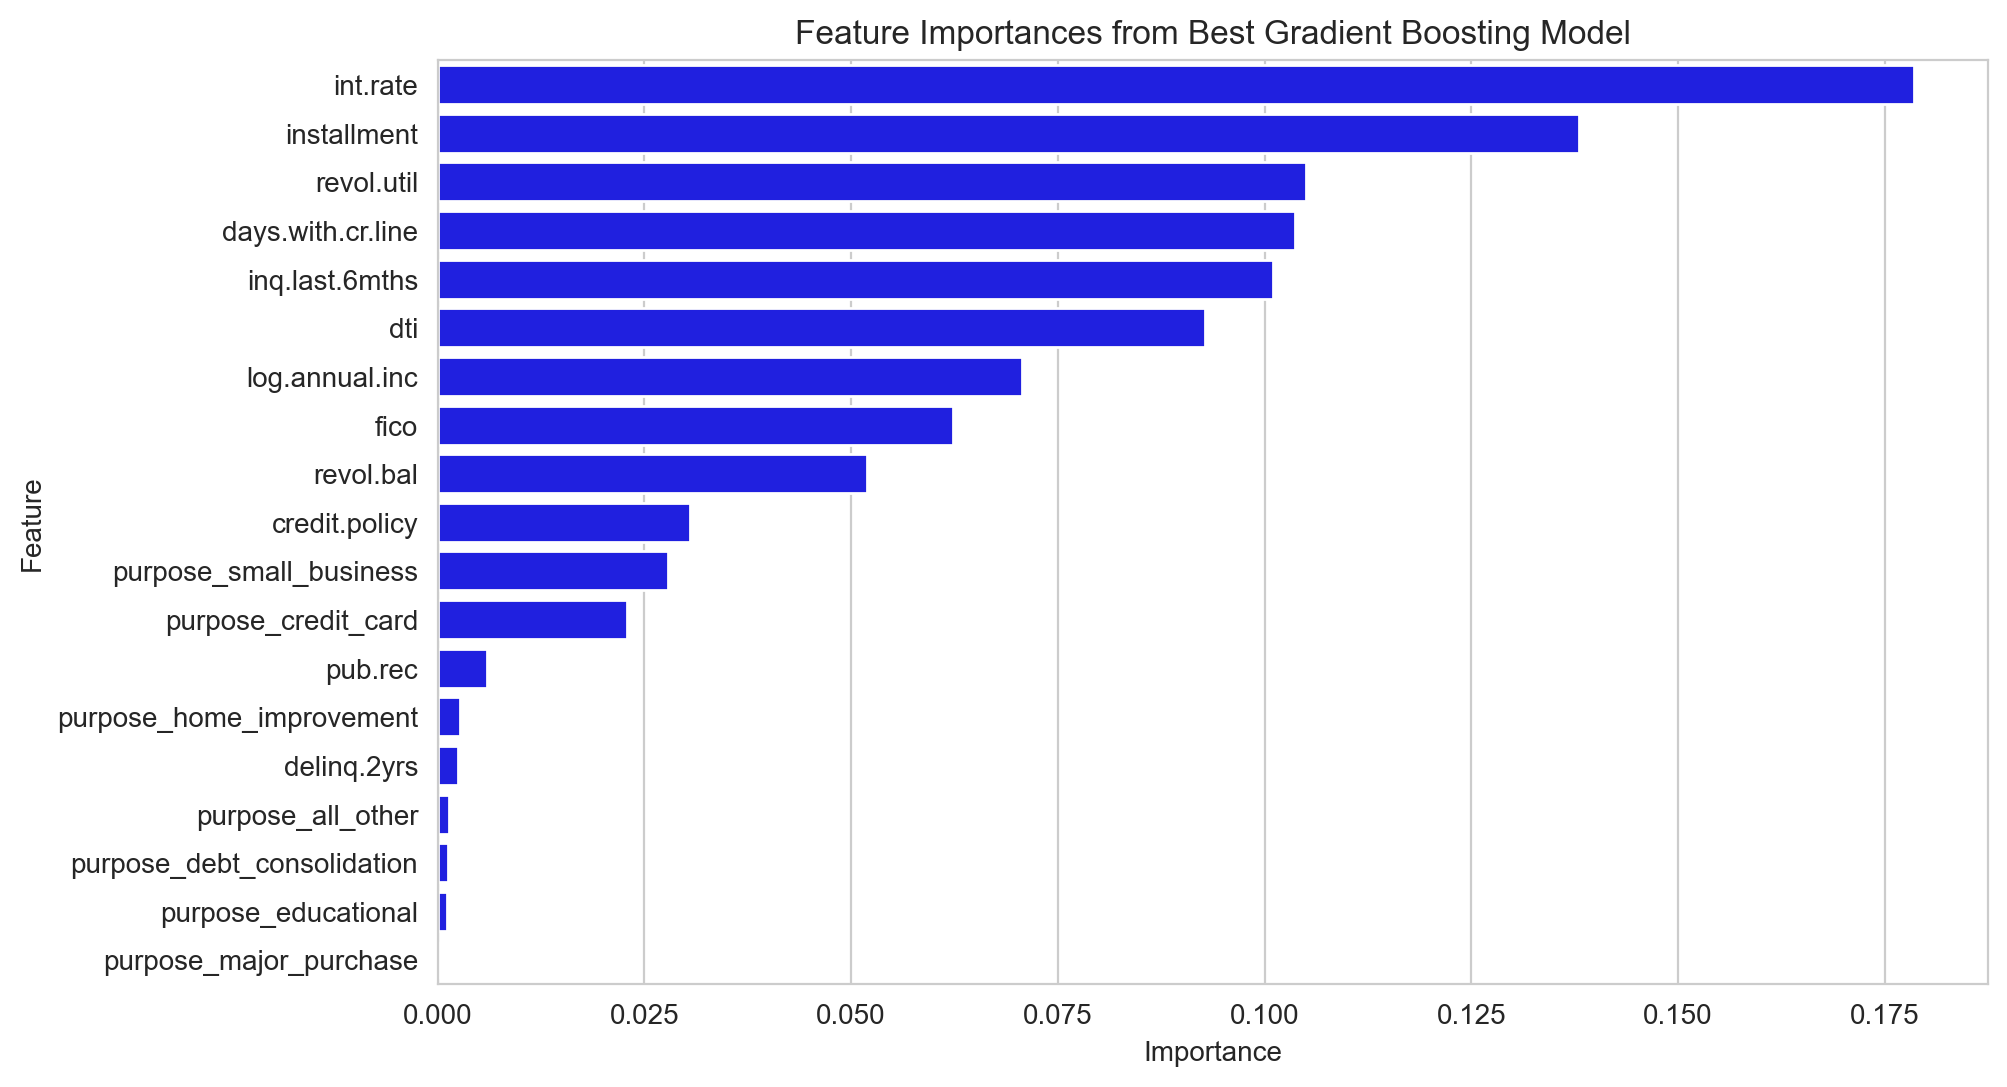

In [52]:
feature_importances_gb = best_gb_model.feature_importances_

# Create a DataFrame to hold the feature names and their importances
importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gb})

# Sort the DataFrame by importance
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb, color='blue')
plt.title('Feature Importances from Best Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

Ways to improve models

Feature Selection using Recursive Feature Elimination (RFE):

I have used RFE with a RandomForestClassifier to select the top 15 features from the dataset. 
RFE is a feature selection method that fits a model and removes the weakest features until the specified number of features is reached. 
By reducing the number of features, the model can become more generalized, which can potentially improve its performance metrics, including recall and F1-score.

Threshold Adjustment for XGBoost:

I have trained an XGBoost classifier and adjusted the decision threshold to classify the positive class.
By default, the threshold is 0.5, but you have set it to 0.3. 
Adjusting the threshold can help in improving recall by making the model more sensitive to the positive class, which can also impact the F1-score.

Using SMOTE with XGBoost:

I have used the Synthetic Minority Over-sampling Technique (SMOTE) in combination with XGBoost. 
SMOTE is an oversampling technique that creates synthetic samples of the minority class. 
By balancing the class distribution, SMOTE can help improve the recall for the minority class, which can also lead to an improvement in the F1-score.

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve

# Train an XGBoost classifier
xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)

# Get predicted probabilities
y_val_prob = xgb.predict_proba(X_val)[:, 1]

# Adjust the decision threshold
threshold = 0.3  # Example threshold, you may need to tune this
y_val_pred_adj = (y_val_prob > threshold).astype(int)

print("XGBoost with Threshold Adjustment:")
print(classification_report(y_val, y_val_pred_adj))


XGBoost with Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.63      0.40      0.49       306
           1       0.54      0.75      0.63       290

    accuracy                           0.57       596
   macro avg       0.58      0.57      0.56       596
weighted avg       0.58      0.57      0.56       596



In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

RANDOM_STATE = 42

# Define a pipeline with SMOTE and a tuned XGBoost classifier
smote_pipeline_tuned = Pipeline([
    ('smote', SMOTE(random_state=RANDOM_STATE, sampling_strategy=1)),  # Adjusted sampling_strategy
    ('xgb', XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=200, random_state=RANDOM_STATE))
])

# Train the pipeline
smote_pipeline_tuned.fit(X_train, y_train)

# Predict and evaluate
y_val_pred_smote_tuned = smote_pipeline_tuned.predict(X_val)
print("Tuned XGBoost with SMOTE:")
print(classification_report(y_val, y_val_pred_smote_tuned))


Tuned XGBoost with SMOTE:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       306
           1       0.58      0.58      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



In [55]:
best_rf_model = RandomForestClassifier(max_depth=32, min_samples_split=20, n_estimators=150, random_state=RANDOM_STATE)

# Use RFE for feature selection (selecting 15 features)
rfe = RFE(estimator=best_rf_model, n_features_to_select=15)
rfe.fit(X_train, y_train)

# Transform the datasets to include only the selected features
X_train_rfe = rfe.transform(X_train)
X_val_rfe = rfe.transform(X_val)
X_test_rfe = rfe.transform(X_test)

# Fit the model on the selected features
best_rf_model.fit(X_train_rfe, y_train)

# Predict and evaluate the model
y_val_pred = best_rf_model.predict(X_val_rfe)
print("Validation performance after RFE:")
print(classification_report(y_val, y_val_pred))


Validation performance after RFE:
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       306
           1       0.61      0.65      0.63       290

    accuracy                           0.63       596
   macro avg       0.63      0.63      0.63       596
weighted avg       0.63      0.63      0.63       596



The F1-score has improved after applying RFE, as the F1-score for the validation set is approximately 0.63 after RFE compared to lower F1-scores before applying RFE. 

# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

In [56]:
# Load the data
loans = pd.read_csv('loans.csv')

# Define the features and target
X = loans.drop('not.fully.paid', axis=1)
y = loans['not.fully.paid']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Create a column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the feature matrix
X_processed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.20, random_state=43)

# Define the best parameters for each classifier
dtree_params = {'max_depth': 15, 'min_samples_split': 25}
rf_params = {'max_depth': 50, 'min_samples_split': 20, 'n_estimators': 150}
ada_params = {'learning_rate': 0.20, 'n_estimators': 40}
grbst_params = {'learning_rate': 0.20, 'n_estimators': 50}

# Define and fit the models
dtree_best_model = DecisionTreeClassifier(**dtree_params, random_state=42)
rf_best_model = RandomForestClassifier(**rf_params, random_state=42)
ada_best_model = AdaBoostClassifier(**ada_params, random_state=42)
grdbst_best_model = GradientBoostingClassifier(**grbst_params, random_state=42)

# Fit models
dtree_best_model.fit(X_train, y_train)
rf_best_model.fit(X_train, y_train)
ada_best_model.fit(X_train, y_train)
grdbst_best_model.fit(X_train, y_train)

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

results_list = []
# Evaluate each model
for model in [dtree_best_model, rf_best_model, ada_best_model, grdbst_best_model]:
    model_name = type(model).__name__ + f" ({', '.join(f'{k}={v}' for k, v in model.get_params().items())})"
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the results to the list
    results_list.append({'Model': model_name,
                         'Precision': precision,
                         'Recall': recall,
                         'F1 Score': f1,
                         'Accuracy': accuracy})
    
    # Print the results
    print(model_name)
    print("Confusion matrix:")
    print(conf_matrix)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 score: {f1}")
    print(f"Accuracy: {accuracy}")
    print("#" * 60)


results_df = pd.DataFrame(results_list)


print(results_df.sort_values('F1 Score', ascending=False))

DecisionTreeClassifier (ccp_alpha=0.0, class_weight=None, criterion=gini, max_depth=15, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=25, min_weight_fraction_leaf=0.0, random_state=42, splitter=best)
Confusion matrix:
[[205  85]
 [168 139]]
Precision: 0.6205357142857143
Recall: 0.4527687296416938
F1 score: 0.5235404896421846
Accuracy: 0.576214405360134
############################################################
RandomForestClassifier (bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion=gini, max_depth=50, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=20, min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)
Confusion matrix:
[[211  79]
 [131 176]]
Precision: 0.6901960784313725
Recall: 0.5732899022801303
F1 score: 0.6263345195729537
Accuracy: 0.6482412060301508
##############

The RandomForestClassifier with the parameters max_depth=50, min_samples_split=20, and n_estimators=150 is the winner among all the models you evaluated. It has the highest F1 score of approximately 0.648, which is generally considered to be a balance between precision and recall and is often used to compare classifier performance on imbalanced datasets.

# Great Job!